In [1]:
from showit import image
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from extraction.utils import make_gaussian
data, series, truth = make_gaussian(n=5, seed=42, noise=0.5, withparams=True)

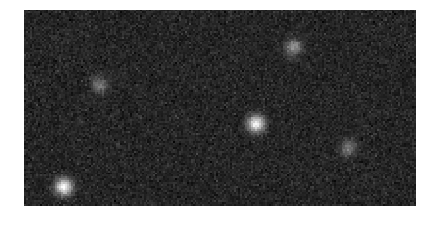

In [4]:
base = data.mean().toarray()
image(base);

In [5]:
from extraction import CNMFWRAP
algorithm = CNMFWRAP(k=5, gSig=[4,4], merge_thresh=0.8)

In [6]:
model = algorithm.fit(data, chunk_size=(100,200))

using 1 processes
Noise Normalization
Roi Extraction...
Refining Components...
 find search location
0
1000
2000


/Users/user/Desktop/GitHub/cnmf/cnmf/spatial.py:560: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if avec[in_] < 0:
/Users/user/Desktop/GitHub/cnmf/cnmf/spatial.py:571: RuntimeWarning: invalid value encountered in divide
  gamma_plus = (lambda_ - dQ) / (one_vec + dQa)
/Users/user/Desktop/GitHub/cnmf/cnmf/spatial.py:571: RuntimeWarning: divide by zero encountered in divide
  gamma_plus = (lambda_ - dQ) / (one_vec + dQa)


3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
Updated Spatial Components
threshold
Computing A_bas
5 out of total 5 temporal components updated
5 out of total 5 temporal components updated
stopping: overall temporal component not changing significantly
********** No neurons merged! ***************


/Users/user/anaconda2/lib/python2.7/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 100, using nperseg = 100
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


 find search location
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
Updated Spatial Components
threshold
Computing A_bas
TRYING AGAIN ECOS
TRYING AGAIN ECOS
TRYING AGAIN ECOS
TRYING AGAIN ECOS
TRYING AGAIN ECOS


/Users/user/anaconda2/lib/python2.7/site-packages/numpy/matrixlib/defmatrix.py:262: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)
/Users/user/Desktop/GitHub/cnmf/cnmf/temporal.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  Ctemp[jj_,:] = C_[None,:]
/Users/user/Desktop/GitHub/cnmf/cnmf/temporal.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  Ytemp[:,jj_] = Ytemp_[:,None]


5 out of total 5 temporal components updated
TRYING AGAIN ECOS
TRYING AGAIN ECOS
TRYING AGAIN ECOS
TRYING AGAIN ECOS
TRYING AGAIN ECOS
5 out of total 5 temporal components updated
stopping: overall temporal component not changing significantly


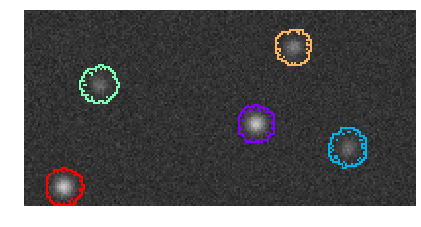

In [7]:
image(model.regions.mask(dims=data.shape[1:], cmap_stroke='rainbow', fill=None, base=base));

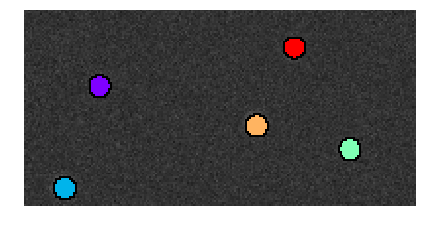

In [8]:
image(truth.regions.mask(dims=data.shape[1:], cmap='rainbow', stroke='black', base=base));

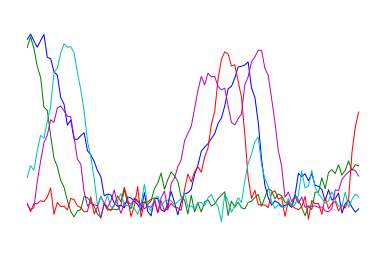

In [9]:
plt.plot(model.transform(data).toarray().T);
plt.axis('off');

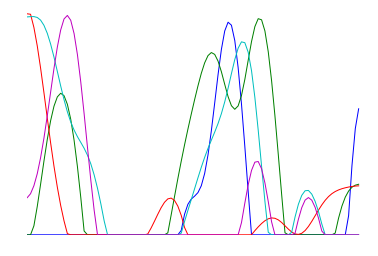

In [10]:
plt.plot(series.T);
plt.axis('off');